In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("resources/games_clean.csv")
print(df.shape)
df.head()

(9507, 17)


,game_id,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,category,mechanic,average_rating,users_rated,category_count,mechanic_count,has_expansion,len_description,description_sentiment
0,1,5,240,14,3,240,Die Macher,240,economic,area control / area influence,7.66508,4498,3,5,0,222,0.091012
1,2,4,30,12,3,30,Dragonmaster,30,card game,trick-taking,6.60815,478,2,1,0,154,0.055291
2,3,4,60,10,2,30,Samurai,60,abstract strategy,area control / area influence,7.44119,12019,2,4,0,183,-0.056250
3,4,4,60,12,2,60,Tal der Könige,60,ancient,action point allowance system,6.60675,314,1,4,0,104,-0.007908
4,5,6,90,12,3,90,Acquire,90,economic,hand management,7.35830,15195,1,3,0,191,0.168056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                9507 non-null   int64  
 1   max_players            9507 non-null   int64  
 2   max_playtime           9507 non-null   int64  
 3   min_age                9507 non-null   int64  
 4   min_players            9507 non-null   int64  
 5   min_playtime           9507 non-null   int64  
 6   name                   9507 non-null   object 
 7   playing_time           9507 non-null   int64  
 8   category               9507 non-null   object 
 9   mechanic               9507 non-null   object 
 10  average_rating         9507 non-null   float64
 11  users_rated            9507 non-null   int64  
 12  category_count         9507 non-null   int64  
 13  mechanic_count         9507 non-null   int64  
 14  has_expansion          9507 non-null   int64  
 15  len_

In [4]:
# :( 
# Null values
# Category/Strings for columns

In [5]:
# # Feature Engineering
# df["Has_Cabin"] = df.Cabin.apply(lambda x: True if pd.notnull(x) else False)
# df["Family_Size"] = df.SibSp + df.Parch + 1
# df["Pclass"] = df.Pclass.astype(str)

In [6]:
df.columns

Index(['game_id', 'max_players', 'max_playtime', 'min_age', 'min_players',
       'min_playtime', 'name', 'playing_time', 'category', 'mechanic',
       'average_rating', 'users_rated', 'category_count', 'mechanic_count',
       'has_expansion', 'len_description', 'description_sentiment'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9507 entries, 0 to 9506
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                9507 non-null   int64  
 1   max_players            9507 non-null   int64  
 2   max_playtime           9507 non-null   int64  
 3   min_age                9507 non-null   int64  
 4   min_players            9507 non-null   int64  
 5   min_playtime           9507 non-null   int64  
 6   name                   9507 non-null   object 
 7   playing_time           9507 non-null   int64  
 8   category               9507 non-null   object 
 9   mechanic               9507 non-null   object 
 10  average_rating         9507 non-null   float64
 11  users_rated            9507 non-null   int64  
 12  category_count         9507 non-null   int64  
 13  mechanic_count         9507 non-null   int64  
 14  has_expansion          9507 non-null   int64  
 15  len_

In [8]:
df.shape

(9507, 17)

In [9]:
df2 = df.copy()

In [10]:
# set columns
meta_cols = ['game_id']
feature_cols = [ 'max_players', 'max_playtime', 'min_age', 'min_players',
       'min_playtime', 'playing_time', 'category', 'mechanic',
       'average_rating', 'users_rated', 'category_count', 'mechanic_count',
       'has_expansion', 'len_description', 'description_sentiment']

In [11]:
# Define Preprocessing Pipelines

# Define preprocessing for numeric features
numeric_features = [ 'max_players', 'max_playtime', 'min_age', 'min_players',
       'min_playtime', 'playing_time', 
       'average_rating', 'users_rated', 'category_count', 'mechanic_count',
       'len_description', 'description_sentiment'] # You can also do this in a loop, select the numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for the binary features
binary_features = ['has_expansion']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature

# Define preprocessing for categorical features
categorical_features = ['category', 'mechanic']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [12]:
# Correlation Analysis (this is optional and not needed for the ML Experiment)
# It just shows what the data looks like after transformation before training
# We will still declare a full pipeline of preprocessing + training

# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df2).toarray()

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final[meta_cols] = df2.loc[:, meta_cols]
df_final.head()

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,average_rating,users_rated,category_count,mechanic_count,len_description,description_sentiment,has_expansion,category_abstract strategy,category_action / dexterity,category_adventure,category_age of reason,category_american civil war,category_american indian wars,category_american revolutionary war,category_american west,category_ancient,category_animals,category_arabian,category_aviation / flight,category_bluffing,category_book,category_card game,category_children's game,category_city building,category_civil war,category_civilization,category_collectible components,category_comic book / strip,category_deduction,category_dice,category_economic,category_educational,category_electronic,category_environmental,category_expansion for base-game,category_exploration,category_fantasy,category_farming,category_fighting,category_game system,category_horror,category_humor,category_industry / manufacturing,category_korean war,category_mafia,category_math,category_mature / adult,category_maze,category_medical,category_medieval,category_memory,category_miniatures,category_modern warfare,category_movies / tv / radio theme,category_murder/mystery,category_music,category_mythology,category_napoleonic,category_nautical,category_negotiation,category_novel-based,category_party game,category_pike and shot,category_pirates,category_political,category_post-napoleonic,category_prehistoric,category_print & play,category_puzzle,category_racing,category_real-time,category_religious,category_renaissance,category_science fiction,category_space exploration,category_spies/secret agents,category_sports,category_territory building,category_trains,category_transportation,category_travel,category_trivia,category_video game theme,category_vietnam war,category_wargame,category_word game,category_world war i,category_world war ii,category_zombies,mechanic_acting,mechanic_action / movement programming,mechanic_action point allowance system,mechanic_area control / area influence,mechanic_area enclosure,mechanic_area movement,mechanic_area-impulse,mechanic_auction/bidding,mechanic_betting/wagering,mechanic_campaign / battle card driven,mechanic_card drafting,mechanic_chit-pull system,mechanic_co-operative play,mechanic_commodity speculation,mechanic_crayon rail system,mechanic_deck / pool building,mechanic_dice rolling,mechanic_grid movement,mechanic_hand management,mechanic_hex-and-counter,mechanic_line drawing,mechanic_memory,mechanic_modular board,mechanic_paper-and-pencil,mechanic_partnerships,mechanic_pattern building,mechanic_pattern recognition,mechanic_pick-up and deliver,mechanic_player elimination,mechanic_point to point movement,mechanic_press your luck,mechanic_rock-paper-scissors,mechanic_role playing,mechanic_roll / spin and move,mechanic_route/network building,mechanic_secret unit deployment,mechanic_set collection,mechanic_simulation,mechanic_simultaneous action selection,mechanic_singing,mechanic_stock holding,mechanic_storytelling,mechanic_take that,mechanic_tile placement,mechanic_time track,mechanic_trading,mechanic_trick-taking,mechanic_variable phase order,mechanic_variable player powers,mechanic_voting,mechanic_worker placement,game_id
0,-0.025793,0.206217,1.216348,1.407807,0.230367,0.206217,1.484124,1.178580,0.253625,1.682974,0.173831,0.315755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,-0.086458,-0.096368,0.633186,1.407807,-0.082570,-0.096368,0.218884,-0.152598,-0.494269,-1.013358,-0.3

In [13]:
corrs = df_final.corr()
corrs

,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,average_rating,users_rated,category_count,mechanic_count,len_description,description_sentiment,has_expansion,category_abstract strategy,category_action / dexterity,category_adventure,category_age of reason,category_american civil war,category_american indian wars,category_american revolutionary war,category_american west,category_ancient,category_animals,category_arabian,category_aviation / flight,category_bluffing,category_book,category_card game,category_children's game,category_city building,category_civil war,category_civilization,category_collectible components,category_comic book / strip,category_deduction,category_dice,category_economic,category_educational,category_electronic,category_environmental,category_expansion for base-game,category_exploration,category_fantasy,category_farming,category_fighting,category_game system,category_horror,category_humor,category_industry / manufacturing,category_korean war,category_mafia,category_math,category_mature / adult,category_maze,category_medical,category_medieval,category_memory,category_miniatures,category_modern warfare,category_movies / tv / radio theme,category_murder/mystery,category_music,category_mythology,category_napoleonic,category_nautical,category_negotiation,category_novel-based,category_party game,category_pike and shot,category_pirates,category_political,category_post-napoleonic,category_prehistoric,category_print & play,category_puzzle,category_racing,category_real-time,category_religious,category_renaissance,category_science fiction,category_space exploration,category_spies/secret agents,category_sports,category_territory building,category_trains,category_transportation,category_travel,category_trivia,category_video game theme,category_vietnam war,category_wargame,category_word game,category_world war i,category_world war ii,category_zombies,mechanic_acting,mechanic_action / movement programming,mechanic_action point allowance system,mechanic_area control / area influence,mechanic_area enclosure,mechanic_area movement,mechanic_area-impulse,mechanic_auction/bidding,mechanic_betting/wagering,mechanic_campaign / battle card driven,mechanic_card drafting,mechanic_chit-pull system,mechanic_co-operative play,mechanic_commodity speculation,mechanic_crayon rail system,mechanic_deck / pool building,mechanic_dice rolling,mechanic_grid movement,mechanic_hand management,mechanic_hex-and-counter,mechanic_line drawing,mechanic_memory,mechanic_modular board,mechanic_paper-and-pencil,mechanic_partnerships,mechanic_pattern building,mechanic_pattern recognition,mechanic_pick-up and deliver,mechanic_player elimination,mechanic_point to point movement,mechanic_press your luck,mechanic_rock-paper-scissors,mechanic_role playing,mechanic_roll / spin and move,mechanic_route/network building,mechanic_secret unit deployment,mechanic_set collection,mechanic_simulation,mechanic_simultaneous action selection,mechanic_singing,mechanic_stock holding,mechanic_storytelling,mechanic_take that,mechanic_tile placement,mechanic_time track,mechanic_trading,mechanic_trick-taking,mechanic_variable phase order,mechanic_variable player powers,mechanic_voting,mechanic_worker placement,game_id
max_players,1.000000,-0.002636,-0.011429,0.075155,-0.003320,-0.002636,-0.028721,-0.000860,0.023899,-0.011697,-0.016640,0.011805,-0.001116,-0.026651,0.029578,-0.008589,-0.010722,-0.020231,-0.004714,-0.003053,-0.003097,-0.012994,-0.003098,-0.002499,0.016463,0.026038,0.007503,0.040385,-0.002335,-0.007187,-0.007305,-0.003512,-0.009442,0.005584,0.004132,0.016524,-0.003059,-0.001382,0.004124,-0.002018,-0.002131,-0.003966,-0.008165,-0.001270,-0.005952,0.033314,-0.001957,0.018042,-0.002577,-0.004332,-0.000917,0.025571,0.006828,-0.000749,-0.002347,-0.008946,0.024137,-0.008510,-0.020344,-0.003363,0.000792,0.002112,-0.002412,-0.019580,-0.011254,-0.000618,-0.001816,0.044176,-0.008220,-0.002151,-0.002237,-0.008463,-0.000790,-0.005406,-0.004731,0.006472,0.

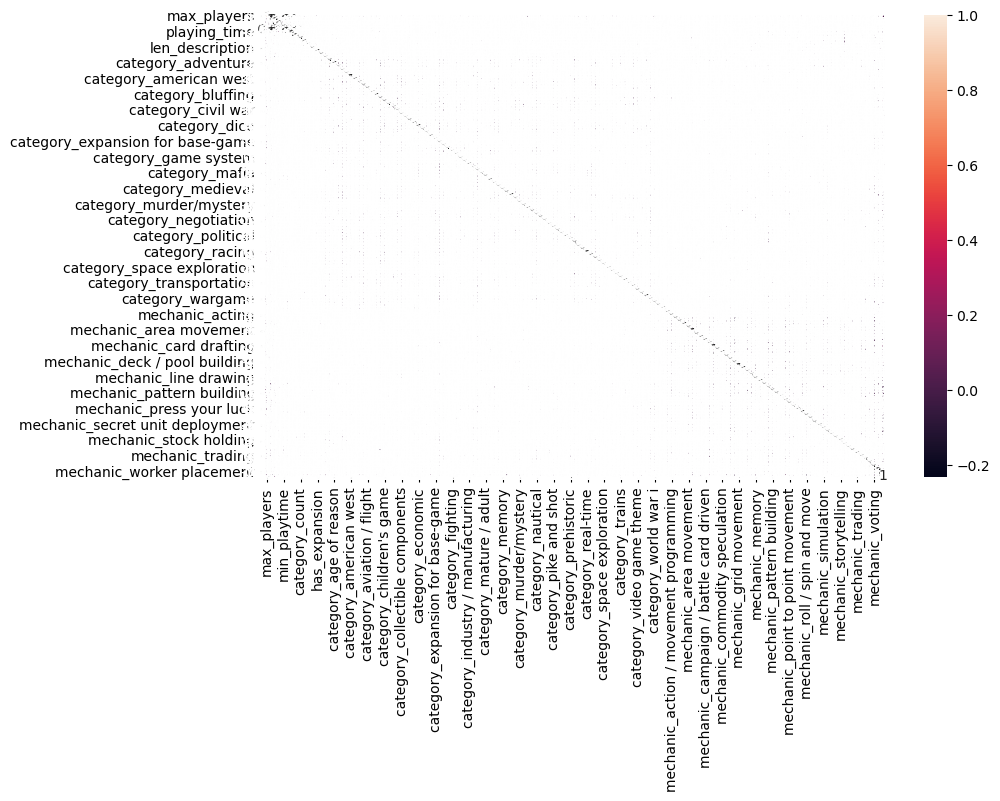

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(corrs, annot=True)
plt.show()

In [15]:
abs(corrs.game_id).sort_values(ascending=False)

game_id                     1.000000
average_rating              0.336686
mechanic_count              0.231291
has_expansion               0.212931
mechanic_hex-and-counter    0.202184
                              ...   
category_humor              0.001168
category_mature / adult     0.000760
category_pirates            0.000562
mechanic_memory             0.000497
category_mafia              0.000283
Name: game_id, Length: 147, dtype: float64

In [16]:
# Copy/Paste Gauntlet

In [17]:
df.game_id.value_counts()

game_id
1         1
91984     1
92046     1
92094     1
92120     1
         ..
10269     1
10272     1
10283     1
10291     1
216725    1
Name: count, Length: 9507, dtype: int64

In [20]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df.drop(columns=["game_id", "name"])
y = df.game_id

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [19]:
X_train.head() # NOTE: THIS IS UNSCALED & UNENCODED

NameError: name 'X_train' is not defined

In [18]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[362  50]
 [ 68 188]]
    
    AUC: 0.8673154960558254

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.88      0.86       412
           1       0.79      0.73      0.76       256

    accuracy                           0.82       668
   macro avg       0.82      0.81      0.81       668
weighted avg       0.82      0.82      0.82       668

    
TEST METRICS
    Confusion Matrix: 
    [[118  19]
 [ 28  58]]
    
    AUC: 0.8335596672890849

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.86      0.83       137
           1       0.75      0.67      0.71        86

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223

    


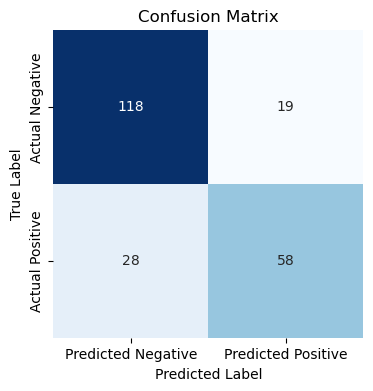

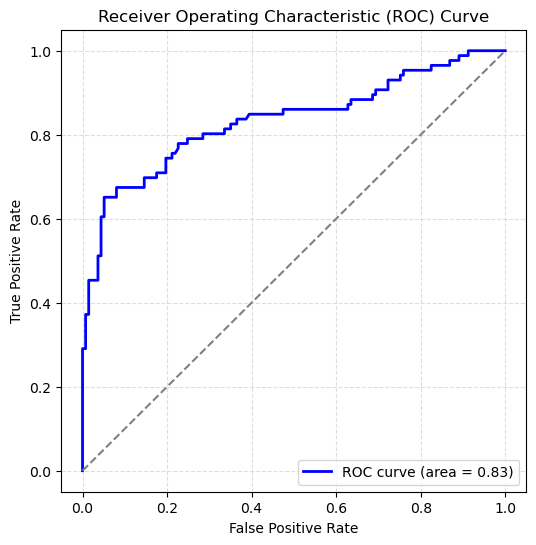

In [19]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[410   2]
 [ 10 246]]
    
    AUC: 0.9990850652305826

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      1.00      0.99       412
           1       0.99      0.96      0.98       256

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668

    
TEST METRICS
    Confusion Matrix: 
    [[116  21]
 [ 27  59]]
    
    AUC: 0.7592938380580546

    Classification Report:
                  precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.74      0.69      0.71        86

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223

    


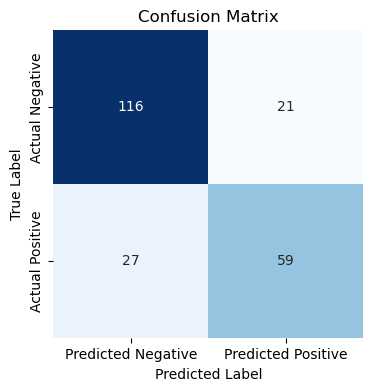

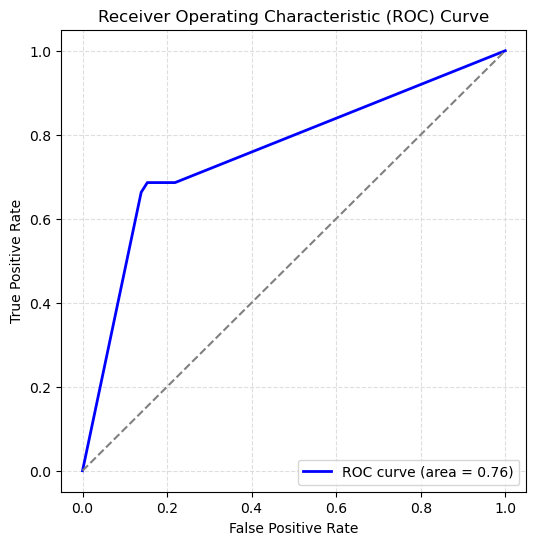

In [20]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[410   2]
 [ 10 246]]
    
    AUC: 0.9973974135315533

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      1.00      0.99       412
           1       0.99      0.96      0.98       256

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668

    
TEST METRICS
    Confusion Matrix: 
    [[121  16]
 [ 26  60]]
    
    AUC: 0.8455270751994567

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.79      0.70      0.74        86

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

    


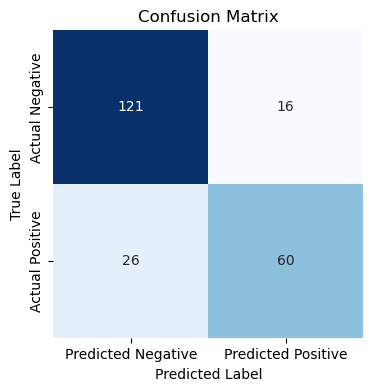

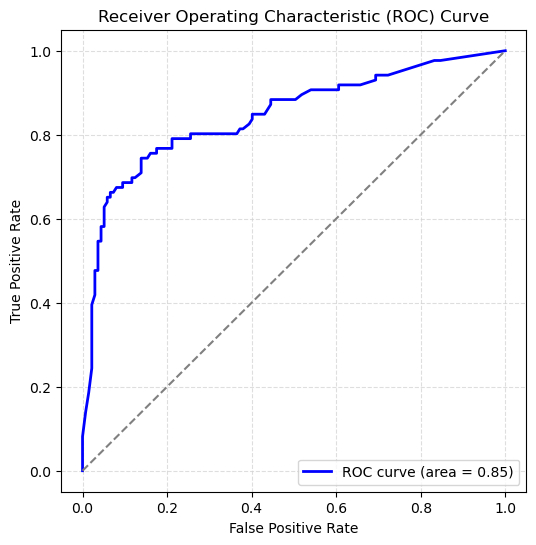

In [21]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[371  41]
 [ 68 188]]
    
    AUC: 0.8933698043082523

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.90      0.87       412
           1       0.82      0.73      0.78       256

    accuracy                           0.84       668
   macro avg       0.83      0.82      0.82       668
weighted avg       0.84      0.84      0.83       668

    
TEST METRICS
    Confusion Matrix: 
    [[125  12]
 [ 24  62]]
    
    AUC: 0.823374639280258

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.91      0.87       137
           1       0.84      0.72      0.78        86

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223

    


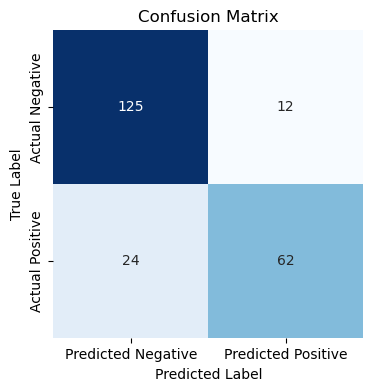

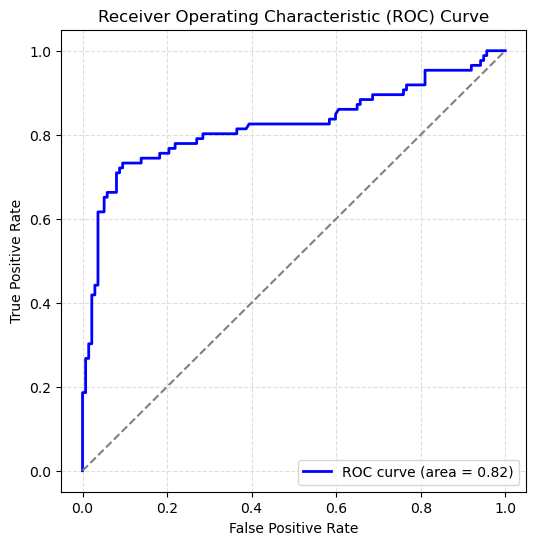

In [22]:
# Step 2: Init the Model
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))
])

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[361  51]
 [ 65 191]]
    
    AUC: 0.8977501137742718

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.88      0.86       412
           1       0.79      0.75      0.77       256

    accuracy                           0.83       668
   macro avg       0.82      0.81      0.81       668
weighted avg       0.83      0.83      0.83       668

    
TEST METRICS
    Confusion Matrix: 
    [[118  19]
 [ 30  56]]
    
    AUC: 0.8275335257171959

    Classification Report:
                  precision    recall  f1-score   support

           0       0.80      0.86      0.83       137
           1       0.75      0.65      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223

    


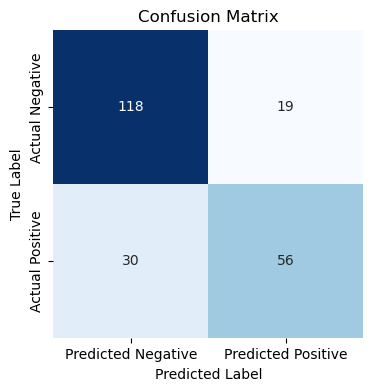

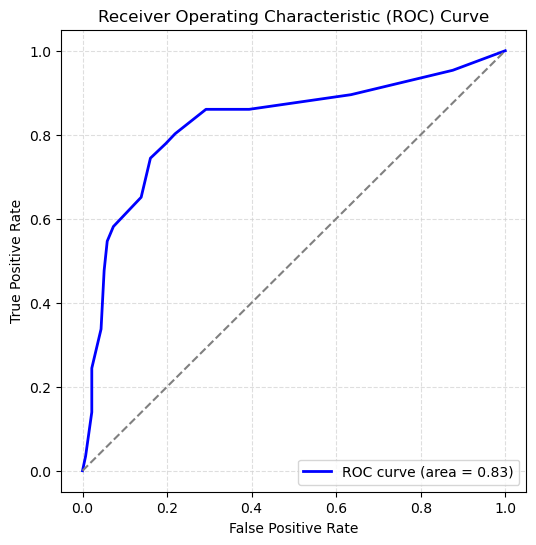

In [23]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[410   2]
 [ 10 246]]
    
    AUC: 0.9990850652305826

    Classification Report:
                  precision    recall  f1-score   support

           0       0.98      1.00      0.99       412
           1       0.99      0.96      0.98       256

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668

    
TEST METRICS
    Confusion Matrix: 
    [[120  17]
 [ 27  59]]
    
    AUC: 0.8352571719572228

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.88      0.85       137
           1       0.78      0.69      0.73        86

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

    


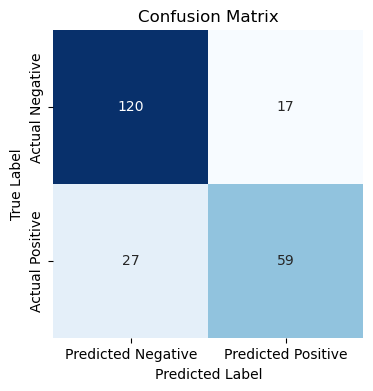

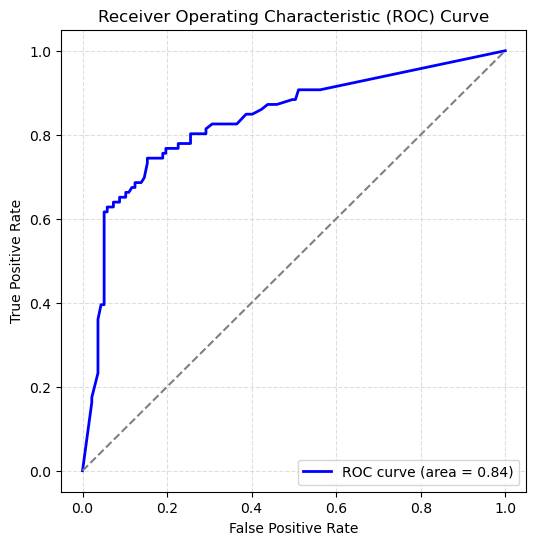

In [24]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[363  49]
 [ 51 205]]
    
    AUC: 0.9193956689927184

    Classification Report:
                  precision    recall  f1-score   support

           0       0.88      0.88      0.88       412
           1       0.81      0.80      0.80       256

    accuracy                           0.85       668
   macro avg       0.84      0.84      0.84       668
weighted avg       0.85      0.85      0.85       668

    
TEST METRICS
    Confusion Matrix: 
    [[119  18]
 [ 26  60]]
    
    AUC: 0.8198098794771685

    Classification Report:
                  precision    recall  f1-score   support

           0       0.82      0.87      0.84       137
           1       0.77      0.70      0.73        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

    


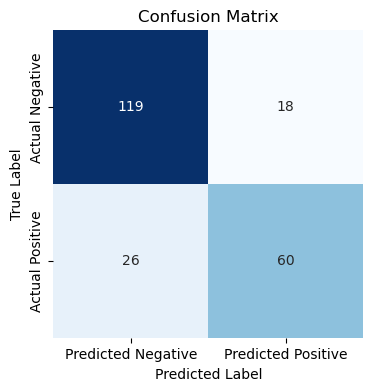

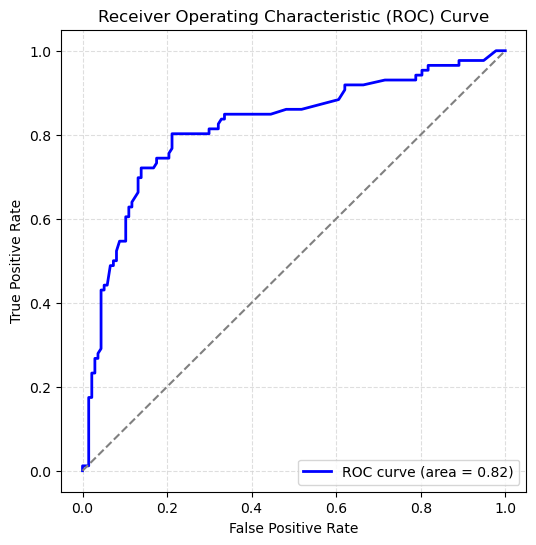

In [25]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[393  19]
 [ 47 209]]
    
    AUC: 0.960619880157767

    Classification Report:
                  precision    recall  f1-score   support

           0       0.89      0.95      0.92       412
           1       0.92      0.82      0.86       256

    accuracy                           0.90       668
   macro avg       0.90      0.89      0.89       668
weighted avg       0.90      0.90      0.90       668

    
TEST METRICS
    Confusion Matrix: 
    [[124  13]
 [ 25  61]]
    
    AUC: 0.8534629095230012

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.91      0.87       137
           1       0.82      0.71      0.76        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.81       223
weighted avg       0.83      0.83      0.83       223

    


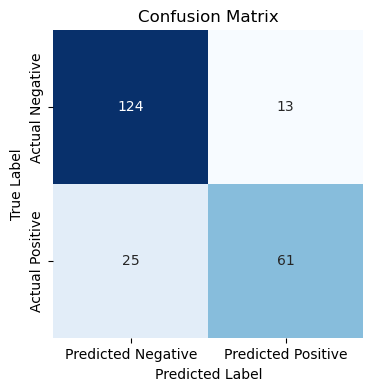

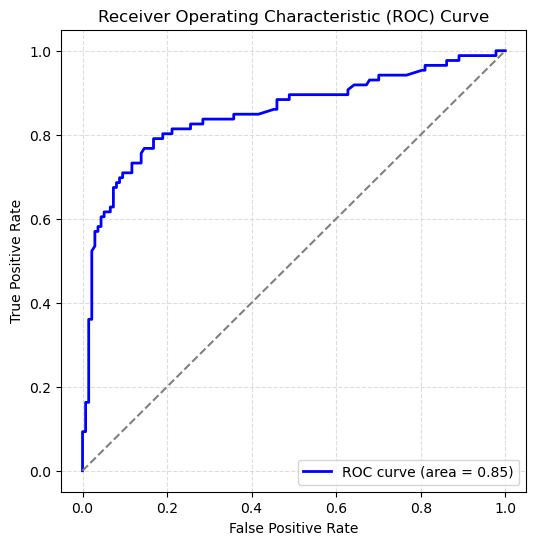

In [26]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[407   5]
 [ 14 242]]
    
    AUC: 0.9965725500606796

    Classification Report:
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98       412
           1       0.98      0.95      0.96       256

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668

    
TEST METRICS
    Confusion Matrix: 
    [[120  17]
 [ 21  65]]
    
    AUC: 0.8557121032082837

    Classification Report:
                  precision    recall  f1-score   support

           0       0.85      0.88      0.86       137
           1       0.79      0.76      0.77        86

    accuracy                           0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

    


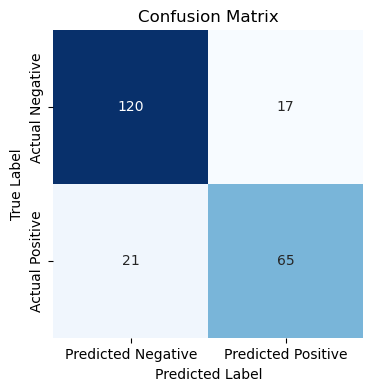

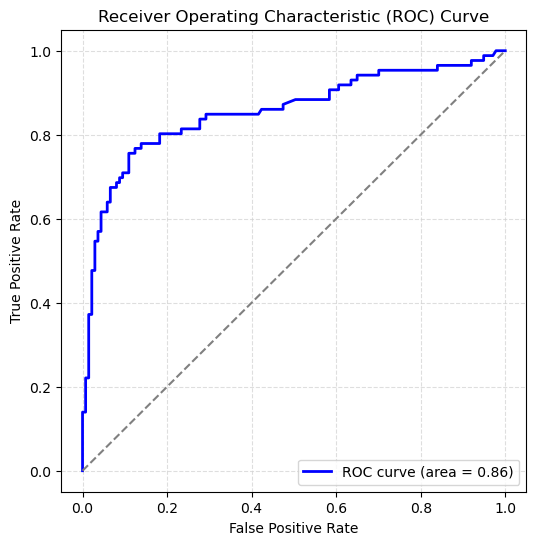

In [28]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[401  11]
 [ 23 233]]
    
    AUC: 0.9906942126820388

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96       412
           1       0.95      0.91      0.93       256

    accuracy                           0.95       668
   macro avg       0.95      0.94      0.95       668
weighted avg       0.95      0.95      0.95       668

    
TEST METRICS
    Confusion Matrix: 
    [[123  14]
 [ 24  62]]
    
    AUC: 0.8541843490069598

    Classification Report:
                  precision    recall  f1-score   support

           0       0.84      0.90      0.87       137
           1       0.82      0.72      0.77        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223

    


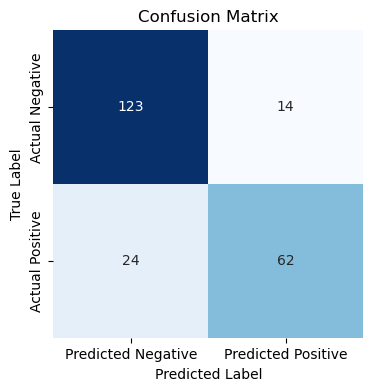

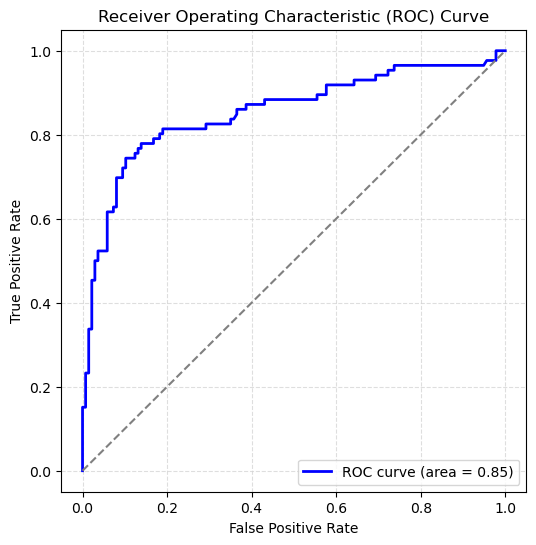

In [29]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [30]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
3,Fare,0.429091
1,Sex,0.154866
0,Pclass,0.142276
2,Age,0.071309
4,Embarked,0.054286
5,Has_Cabin,0.013210
6,Family_Size,0.004052


In [31]:
fi = pd.DataFrame(list(zip(X.columns, xgb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
3,Fare,0.426613
4,Embarked,0.111434
6,Family_Size,0.057377
2,Age,0.047406
0,Pclass,0.029762
1,Sex,0.029245
5,Has_Cabin,0.020371


In [32]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.named_steps['classifier'].feature_importances_ / sum(lgbm.named_steps['classifier'].feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Sex,0.447585
0,Pclass,0.345112
2,Age,0.063604
3,Fare,0.039262
4,Embarked,0.020809
6,Family_Size,0.011779
5,Has_Cabin,0.004319


In [33]:
fi = pd.DataFrame(list(zip(X.columns, ada.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
1,Sex,0.46
0,Pclass,0.28
2,Age,0.10
3,Fare,0.06
4,Embarked,0.02
6,Family_Size,0.02
5,Has_Cabin,0.00


In [34]:
# Gradient Boosting is probably Best

In [35]:
# Do Cross Validation to evaluate the model on the ENTIRE dataset
# Were we biased by our random split?
# This is also a good way to test out a few close algorithms on a single metric

In [36]:
# Create a pipeline with a scaler and a logistic regression model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.85296443 0.82907754 0.85969251 0.85381016 0.87481718]
Mean AUC: 0.854


In [37]:
# Create a pipeline with a scaler and a logistic regression model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(ada, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.82213439 0.82339572 0.87613636 0.87205882 0.89243452]
Mean AUC: 0.857


In [38]:
# Create a pipeline with a scaler and a logistic regression model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(gb, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.85928854 0.81764706 0.90601604 0.87406417 0.92274963]
Mean AUC: 0.876


In [39]:
# Create a pipeline with a scaler and a logistic regression model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(xgb, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.84038208 0.82667112 0.90280749 0.85093583 0.89223508]
Mean AUC: 0.863


In [40]:
# Create a pipeline with a scaler and a logistic regression model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.84815547 0.82506684 0.89712567 0.86684492 0.90327084]
Mean AUC: 0.868


In [41]:
# Gradient Boosting is Best AUC when evaluated using KFold Cross Validation
# (it also has highest accuracy if swap roc_auc with accuracy)

In [42]:
# Part 3: Model Productionalization

In [43]:
# Retrain the model on the ENTIRE dataset
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])
gb.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'Family_Size']),
                                                 ('binary',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('label',
                                                                   OrdinalEncoder())]),
                                                  ['Sex', 'Has_Cabin']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Embarked'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [44]:
# Save off my models
import pickle

# Model
pickle.dump(gb, open("titanic_model_pipeline2.h5", 'wb'))

In [45]:
# Production Use Case

In [46]:
df_test = pd.read_csv("test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
# Combine SibSp + Parch to create ONE column for family_size
df_test["Has_Cabin"] = df_test.Cabin.apply(lambda x: True if pd.notnull(x) else False)
df_test["Family_Size"] = df_test.SibSp + df_test.Parch + 1
df_test["Pclass"] = df_test.Pclass.astype(str)
df_test.drop(columns=["Cabin", "SibSp", "Parch", "Name", "Ticket"], inplace=True)

# Save IDs for later
ids = df_test.PassengerId
df_test.drop(columns=["PassengerId"], inplace=True)
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Family_Size
0,3,male,34.5,7.8292,Q,False,1
1,3,female,47.0,7.0000,S,False,2
2,2,male,62.0,9.6875,Q,False,1
3,3,male,27.0,8.6625,S,False,1
4,3,female,22.0,12.2875,S,False,3


In [49]:
# NOTE: by putting all of the pre-processing into a pipeline, it is less management to deal with
# at the production state

In [50]:
# model
model = pickle.load(open("titanic_model_pipeline2.h5", 'rb'))

# columns in order
df_test = df_test.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Has_Cabin', 'Family_Size']]

preds = model.predict(df_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
submission = pd.DataFrame()
submission["PassengerId"] = ids
submission["Survived"] = preds
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
submission.to_csv("titanic_submission3.csv", index=False)